In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data.csv')
df.head() # breast cnacer dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.drop(columns=['id','Unnamed: 32'],inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 31)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0],test_size=0.2, random_state=2)

In [ ]:
X_train.shape

(455, 30)

KNN is based on distance. So scaling is important

In [ ]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [ ]:
X_train

array([[-0.01330339,  1.7757658 , -0.01491962, ..., -0.13236958,
        -1.08014517, -0.03527943],
       [-0.8448276 , -0.6284278 , -0.87702746, ..., -1.11552632,
        -0.85773964, -0.72098905],
       [ 1.44755936,  0.71180168,  1.47428816, ...,  0.87583964,
         0.4967602 ,  0.46321706],
       ...,
       [-0.46608541, -1.49375484, -0.53234924, ..., -1.32388956,
        -1.02997851, -0.75145272],
       [-0.50025764, -1.62161319, -0.527814  , ..., -0.0987626 ,
         0.35796577, -0.43906159],
       [ 0.96060511,  1.21181916,  1.00427242, ...,  0.8956983 ,
        -1.23064515,  0.50697397]])

In [ ]:
y_train

,diagnosis
560,B
428,B
198,M
203,M
41,M
...,...
299,B
534,B
493,B
527,B


### KNN using sklearn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5) # k=5 by default.

knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred=knn.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [ ]:
scores = []

for i in range(1,16):

    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train,y_train)

    y_pred = knn.predict(X_test)

    scores.append(accuracy_score(y_test, y_pred))
sorted(scores)

[0.956140350877193,
 0.9649122807017544,
 0.9649122807017544,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9912280701754386]

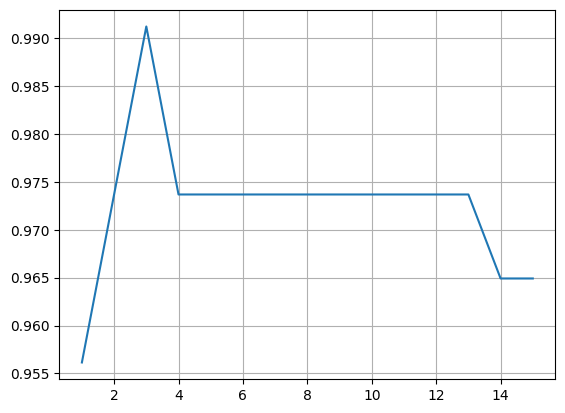

In [ ]:
plt.plot(range(1,16),scores)
plt.grid()

In [ ]:
# from the char we can see for k=3 we get highest accuracy score

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3) #k=3

knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.9912280701754386

# KNN from scratch

In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter

In [ ]:
df1=pd.read_csv('/content/Social_Network_Ads.csv')
df1.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df1 = df.iloc[:,0:]
df1.head(3)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0


In [ ]:
encoder = LabelEncoder()

df1['Gender'] = encoder.fit_transform(df1['Gender'])
df1.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [ ]:
X = df1.iloc[:,0:3].values
X

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]])

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [ ]:
y = df1.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
print(X_train.shape)
print(X_test.shape)

(320, 3)
(80, 3)


In [ ]:

class my_Knn:

    def __init__(self,k=5):
        self.n_neighbors = k
        self.X_train = None
        self.y_train = None

    def fit(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self,X_test):

        y_pred = []

        for i in X_test:
            # calculate distance with each training point
            distances = []
            for j in self.X_train:
                distances.append(self.calculate_distance(i,j))
            n_neighbors = sorted(list(enumerate(distances)),key=lambda x:x[1])[0:self.n_neighbors]
            label = self.majority_count(n_neighbors)
            y_pred.append(label)
        return np.array(y_pred)


    def calculate_distance(self,point_A,point_B):
        return np.linalg.norm(point_A - point_B)

    def majority_count(self,neighbors):
        votes = []
        for i in neighbors:
            votes.append(self.y_train[i[0]])
        votes = Counter(votes)

        return votes.most_common()[0][0]



In [ ]:
KNN= my_Knn(k=3)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9125


In [ ]:
# using sklearn class
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9125
